---
# 01. Data Load
---

In [82]:
import pandas as pd

# windows에서 엑셀을 cp949방식으로 저장을 하기 때문에 encoding="utf-8"이 아니라 encoding="cp949" 이용해야함
user_restaurant_data = pd.read_csv("/content/drive/MyDrive/dataset/user_item_data.csv", encoding="utf-8")
user_restaurant_data.head()

,Unnamed: 0,user_id,restaurant_id,rating,restaurant
0,0,1,165,2.8,오춘자비어 부산하단점
1,1,2,165,5.0,오춘자비어 부산하단점
2,3,8,165,5.0,오춘자비어 부산하단점
3,4,11,165,4.9,오춘자비어 부산하단점
4,6,12,165,2.8,오춘자비어 부산하단점


In [83]:
user_restaurant_data = user_restaurant_data.drop("Unnamed: 0", axis=1)
user_restaurant_data

,user_id,restaurant_id,rating,restaurant
0,1,165,2.8,오춘자비어 부산하단점
1,2,165,5.0,오춘자비어 부산하단점
2,8,165,5.0,오춘자비어 부산하단점
3,11,165,4.9,오춘자비어 부산하단점
4,12,165,2.8,오춘자비어 부산하단점
...,...,...,...,...
31329,390,40,4.4,족발쌀롱 하단점
31330,394,40,2.7,족발쌀롱 하단점
31331,395,40,4.6,족발쌀롱 하단점
31332,396,40,3.6,족발쌀롱 하단점


In [84]:
user_restaurant_data.shape

(31334, 4)

---
# 02. Change Data
---

---
* row : user_id
* column : restaurant
* value : rating 
---

In [85]:
# 사용자가 평점을 매기지 않은 음식점에는 NaN값 대신 0으로 채움
user_restaurant_rating = user_restaurant_data.pivot_table("rating", index="user_id", columns="restaurant").fillna(0)

In [86]:
user_restaurant_rating.shape

(400, 193)

In [87]:
user_restaurant_rating.head()

restaurant,1979남포통닭 하단점,5평바다,BHC치킨 부산하단점,KFC 하단역,가마솥추어탕,가마치통닭 동아대점,가우리 본점,강동농원,거누광장 하단점,경대컵밥 동아대점,...,하이뽕 동아대점,한옥마을 전주비빔밥 아트몰링 부산본점,해운대31cm해물칼국수 하단점,해운대신대구탕,혜자식당,호맥 하단점,홍갓츠,홍주방 하단본점,화반 하단점,후라이드참잘하는집 하단당리점
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.9,0.0,3.1,0.0,0.0,0.0,3.6,2.1,0.0,4.7,...,0.0,3.0,5.0,0.0,3.9,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.7,0.0,3.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.2,0.0,3.5,0.0,3.5
3,3.3,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,...,0.0,0.0,4.5,0.0,0.0,0.0,2.6,0.0,0.0,0.0
4,3.4,0.0,1.3,2.8,0.0,5.0,0.0,2.6,2.7,3.2,...,0.0,0.0,0.0,2.6,0.0,0.0,0.0,0.0,1.1,0.0
5,0.0,4.5,0.0,0.0,0.0,0.0,3.2,0.0,0.0,0.0,...,0.0,4.4,0.0,5.0,4.1,5.0,4.3,1.5,0.0,4.5


In [88]:
# user_restaurant -> restaurant_user로 전치 
restaurant_user_rating = user_restaurant_rating.values.T  
restaurant_user_rating.shape

(193, 400)

---
# 03. SVD
---

In [89]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(restaurant_user_rating)
matrix.shape

(193, 12)

In [90]:
matrix[0]

array([22.41887293,  0.18232632, -2.19390671,  0.14841616, -3.2728524 ,
       -1.00103335,  1.3416942 ,  4.92693437,  4.80190455,  1.52368598,
       -3.43928821, -2.21156732])

In [92]:
# corrcoef를 이용하여 피어슨 상관계수 구함 
import numpy as np

corr = np.corrcoef(matrix)
corr.shape

(193, 193)

<Axes: >

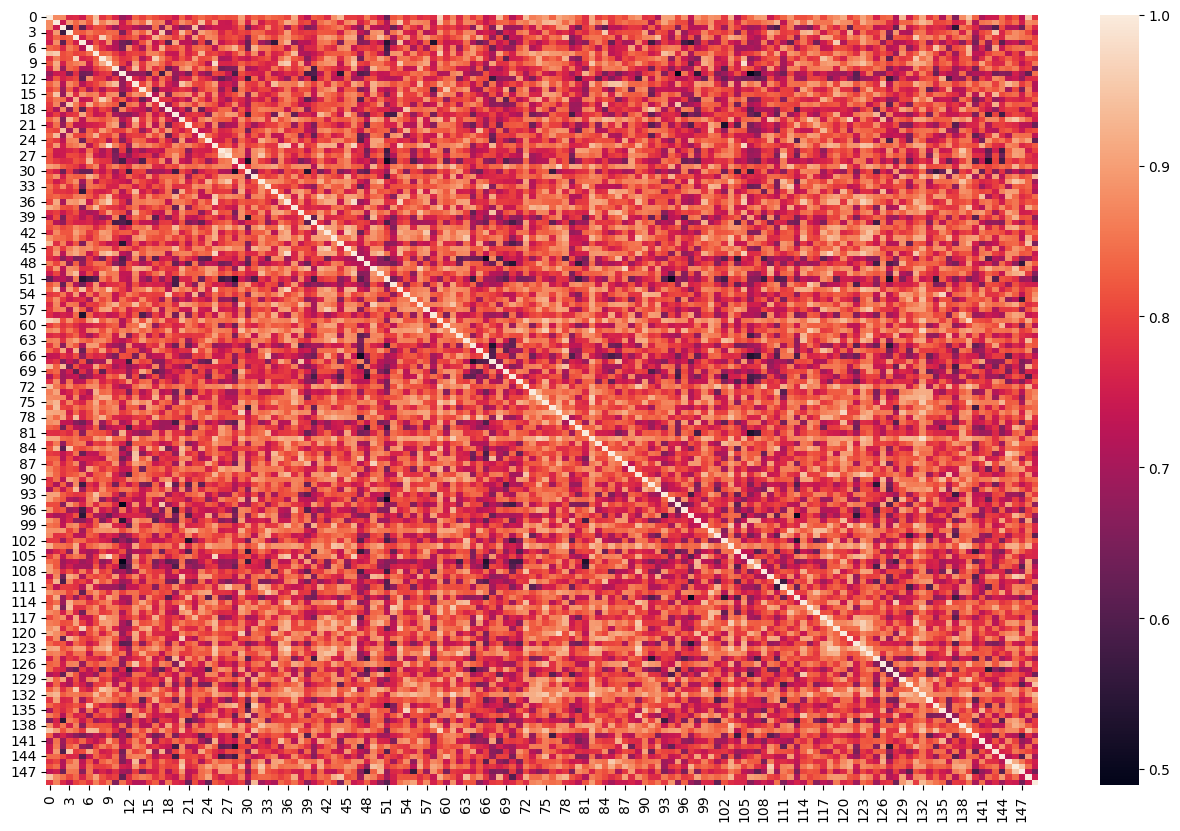

In [101]:
# seaborn의 heatmap을 이용 -> 상관계수끼리의 관계 확인 
import matplotlib.pyplot as plt 
import seaborn as sns 

corr2 = corr[:150, :150]
corr2.shape
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

---
# 04. 음식점 추천
---

In [105]:
# 음식점 목록 생성 
restaurant_name = user_restaurant_rating.columns
restaurant_name_list = list(restaurant_name)
print(restaurant_name_list)

['1979남포통닭 하단점', '5평바다', 'BHC치킨 부산하단점', 'KFC 하단역', '가마솥추어탕', '가마치통닭 동아대점', '가우리 본점', '강동농원', '거누광장 하단점', '경대컵밥 동아대점', '고기는모름지기연탄구이 하단점 ', '고기묵짜 부산점', '고래섬 동아대점', '고봉민김밥인 부산하단오거리점', '고성횟집', '광명수산', '교동면옥 부산하단점', '구포국수 하단점', '굽네치킨 부산하단점', '금산참치 하단점', '긴자', '긴타로 하단점', '김가네 하단동아대점', '꼬기만땅점보비빔밥 하단점', '꼴목 부산하단점', '꽃마름 부산하단역점', '남다른감자탕 부산하단점', '노브랜드버거 부산하단아트몰링점', '누리마을감자탕 하단점', '니뽕내뽕 아트몰링하단점', '다맛', '단골손님 하단점', '닭도리탕', '대가야', '대독장 하단점', '더덕먹은제주뚱돼지', '더램', '더벤티 하단역점', '더브런치하우스', '더진국 국밥&냉면 하단점', '더피쉬', '돈미담', '돌담식당', '동대식당', '동대앞신석쇠구이부산본점', '동원장수촌', '두꺼비 오뎅', '두끼 부산하단점', '두찜 부산하단점', '또아식빵 하단점', '라마마', '롤링파스타 하단역점', '롯데리아 부산하단점', '리코리코 동아대점', '마리스 수제케이크', '마리웨일237 동아대점', '마장동김씨 하단점', '마카롱블라썸', '막썰어회&해물', '만포장횟집', '맥도날드 동아대점', '맥도날드 부산하단DT점', '맥주를구한피자 하단점', '모두와', '문창식갈비탕 하단점', '미카도스시 부산아트몰링점', '바닐라808', '바쿠스', '배스킨라빈스 부산하단점', '백미 옛날갈비', '백스비어 하단점', '별난김해뒷고기껍데기 하단점', '별난낙지 하단점', '보배반점 하단점', '복성반점중식당', '본가 부산사하점', '봉대박스파게티 동아대점', '부산삼겹살 하단본점', '부산쪽쪽갈비', '북창동순두부 하단아트몰링점', '불끈낙지 하단점', '블랙업커피 을숙도점',

In [135]:
# 상관계수 이용 -> '특정 음식점'과 관련하여 상관계수가 높은 음식점 추천 
restauran_choice = restaurant_name_list.index("홍갓츠")
corr_restauran_choice = corr[restauran_choice]
restaurant_recommend= list(restaurant_name[(corr_restauran_choice >= 0.9)])[:6]

In [137]:
# 추천: 음식점 6개
count = 1

for restaurant in restaurant_recommend:
    print(f"♥ {count}번째 추천 음식점은 {restaurant}")
    count = count + 1

♥ 1번째 추천 음식점은 또아식빵 하단점
♥ 2번째 추천 음식점은 마장동김씨 하단점
♥ 3번째 추천 음식점은 맥도날드 동아대점
♥ 4번째 추천 음식점은 소미돈까스 하단점
♥ 5번째 추천 음식점은 순대마을 하단본점
♥ 6번째 추천 음식점은 원카츠 하단점
